In [93]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [16]:
x = torch.tensor(1.0, requires_grad=True)
y = x**2 + 2*x + 1
y.backward()
x.grad

tensor(4.)

In [247]:
digits = load_digits()

X_scaled = (digits.data - np.min(digits.data))/(np.max(digits.data) - np.min(digits.data))

X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.nn.functional.one_hot(torch.tensor(digits.target, dtype=torch.long)).float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [278]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super().__init__()
        self.layer1 = torch.nn.Linear(n_inputs, n_hidden)
        self.layer2 = torch.nn.Linear(n_hidden, n_outputs)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x
    
model = NeuralNetwork(64, 16, 10)

loss_criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        optimizer.zero_grad()
        y_pred = model(X_train[i])
        loss = loss_criterion(y_pred, y_train[i])
        loss.backward()
        optimizer.step()

In [279]:
for k in range(20):
    print(torch.argmax(y_test[k]), torch.argmax(model(X_test[k])))

tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(7) tensor(7)
tensor(3) tensor(2)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(2) tensor(2)


In [315]:
model.eval()

neuron_index = 8

input_array = np.random.randint(120, 136, size=64)

learning_rate = 0.1
num_iterations = 10000

images = []

for image in range(5):
    input_tensor = torch.randn(64, requires_grad=True)
    
    for i in range(num_iterations):
        output = model(input_tensor)
        output[neuron_index].backward()
        input_tensor.data += learning_rate * input_tensor.grad.data
        input_tensor.grad.zero_()
        
    img = input_tensor.detach().numpy().reshape((8, 8))
    img = (img - np.min(img))/(np.max(img) - np.min(img))*256
    
    images.append(img)

(tensor([-1.1748, -0.3274, -0.0368,  0.2204, -3.8715, -0.5646, -2.0427, -1.4087,
          7.2799,  1.8534], grad_fn=<AddBackward0>),
 tensor([-1.2101,  1.0331, -1.1444, -2.9519,  0.0874,  4.8113,  0.1122, -0.9210,
          1.1883, -0.1307], grad_fn=<AddBackward0>))

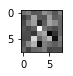

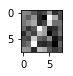

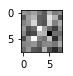

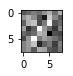

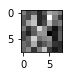

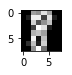

In [348]:
for i in range(len(images)):
    fig = plt.figure(figsize=(0.75, 5))
    fig.add_subplot(5, 1, i+1)
    plt.imshow(images[i], cmap="gray")
plt.figure(figsize=(0.75,0.75))
plt.imshow(X_train[38].detach().numpy().reshape((8,8)), cmap="gray")

model(input_tensor), model(X_train[8])

In [253]:
for param in list(model.parameters())[0]:
    print(param)

tensor([ 0.0669, -0.0606, -0.3770,  0.2658, -0.2238, -0.5057, -0.4339,  0.0391,
         0.0027, -0.0645, -0.0958,  0.0036,  0.3515,  0.9502, -0.0503, -0.1311,
         0.0732,  0.0164, -0.2551,  0.0250,  0.7291,  1.1540,  0.2893,  0.0385,
         0.0114, -0.3838, -0.7896,  0.0045, -0.1770, -0.4609, -0.3275, -0.0389,
         0.0534, -0.3730, -0.6194, -0.1525, -0.4710, -1.1764, -0.5475,  0.0099,
         0.0443, -0.4057,  0.2958, -0.4302, -0.5335, -0.2181, -0.1040, -0.0095,
        -0.0620, -0.1483,  0.5810,  0.1037,  0.4851,  1.1500,  0.3845,  0.0050,
         0.0608, -0.1177, -0.5317,  0.2123,  0.8615,  0.9370,  0.3266,  0.0580],
       grad_fn=<UnbindBackward0>)
tensor([ 1.1119e-01,  7.6054e-02,  6.5756e-01,  7.2665e-01,  5.7900e-01,
         4.5564e-02, -2.5421e-03,  9.9090e-03,  2.2926e-02,  4.1724e-01,
         1.0869e+00,  2.4232e-01,  2.9920e-01,  9.1242e-02,  3.1674e-02,
         1.2117e-02,  4.3071e-02,  5.7347e-01,  3.4460e-01, -8.9873e-01,
        -5.7070e-01,  2.6570e-01,